In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the weather data
weather = pd.read_csv('weather_data.csv', index_col="Date_Time")

In [ ]:
# Display the first few rows of the dataset
print("Dataset Overview:")
print(weather.head())

Dataset Overview:
                         Location  Temperature_C  Humidity_pct  \
Date_Time                                                        
2024-01-14 21:12:46     San Diego      10.683001     41.195754   
2024-05-17 15:22:10     San Diego       8.734140     58.319107   
2024-05-11 09:30:59     San Diego      11.632436     38.820175   
2024-02-26 17:32:39  Philadelphia      -8.628976     54.074474   
2024-04-29 13:23:51   San Antonio      39.808213     72.899908   

                     Precipitation_mm  Wind_Speed_kmh  
Date_Time                                              
2024-01-14 21:12:46          4.020119        8.233540  
2024-05-17 15:22:10          9.111623       27.715161  
2024-05-11 09:30:59          4.607511       28.732951  
2024-02-26 17:32:39          3.183720       26.367303  
2024-04-29 13:23:51          9.598282       29.898622  


In [ ]:
# Basic statistics of the dataset
print("\nDataset Statistics:")
print(weather.describe())


Dataset Statistics:
       Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count   50361.000000  50361.000000      50361.000000    50361.000000
mean       14.794853     60.121012          5.118433       15.020588
std        14.469207     17.329384          2.947153        8.691356
min       -19.700813     30.001412          0.000009        0.000334
25%         2.300761     45.172583          2.586701        7.465440
50%        14.814426     60.156718          5.121573       15.009565
75%        27.183842     75.167565          7.628836       22.620917
max        39.999642     89.999082         14.837122       29.999157


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(weather.isnull().sum())


Missing Values:
Location            0
Temperature_C       1
Humidity_pct        1
Precipitation_mm    1
Wind_Speed_kmh      1
dtype: int64


In [ ]:
# Fill missing values (if any) using forward fill
weather.fillna(method='ffill', inplace=True)


<ipython-input-9-b17e752ab6fd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather.fillna(method='ffill', inplace=True)


In [ ]:
# Visualizations
sns.set(style="whitegrid", palette="muted")

In [ ]:
# Identify anomalies: Extreme temperatures
mean_temp = weather['Temperature_C'].mean()
std_temp = weather['Temperature_C'].std()
threshold = 2  # Define anomaly threshold in terms of standard deviations

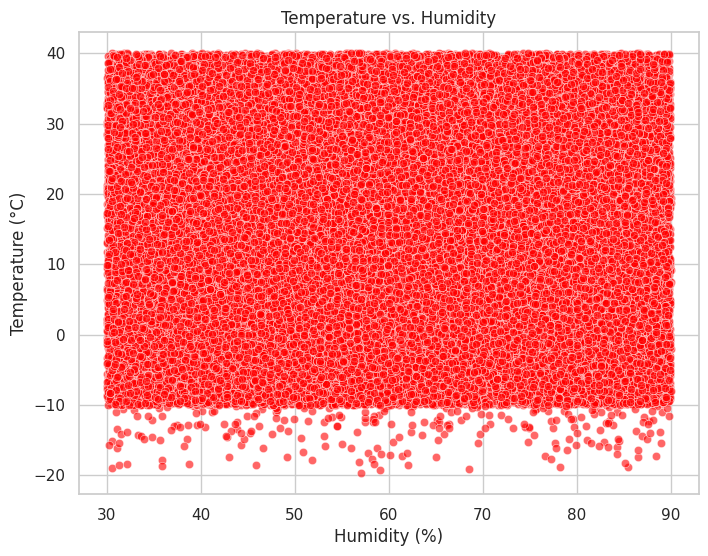

In [ ]:
# Scatter plot: Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=weather, x='Humidity_pct', y='Temperature_C', alpha=0.6, color='red')
plt.title('Temperature vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

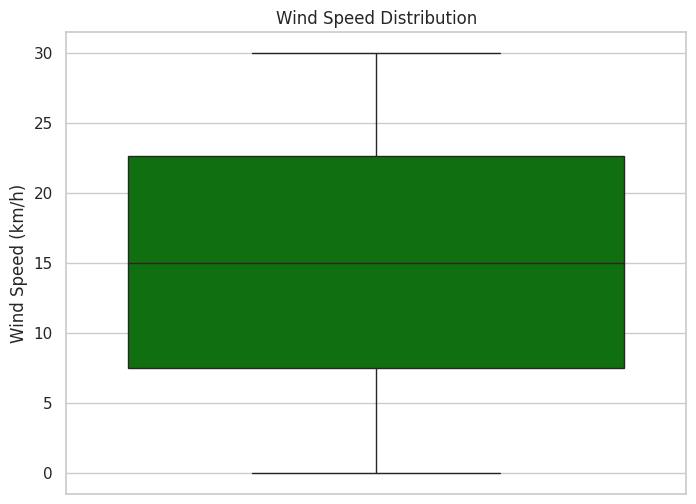

In [ ]:
# Boxplot: Wind Speed Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=weather, y='Wind_Speed_kmh', color='green')
plt.title('Wind Speed Distribution')
plt.ylabel('Wind Speed (km/h)')
plt.show()

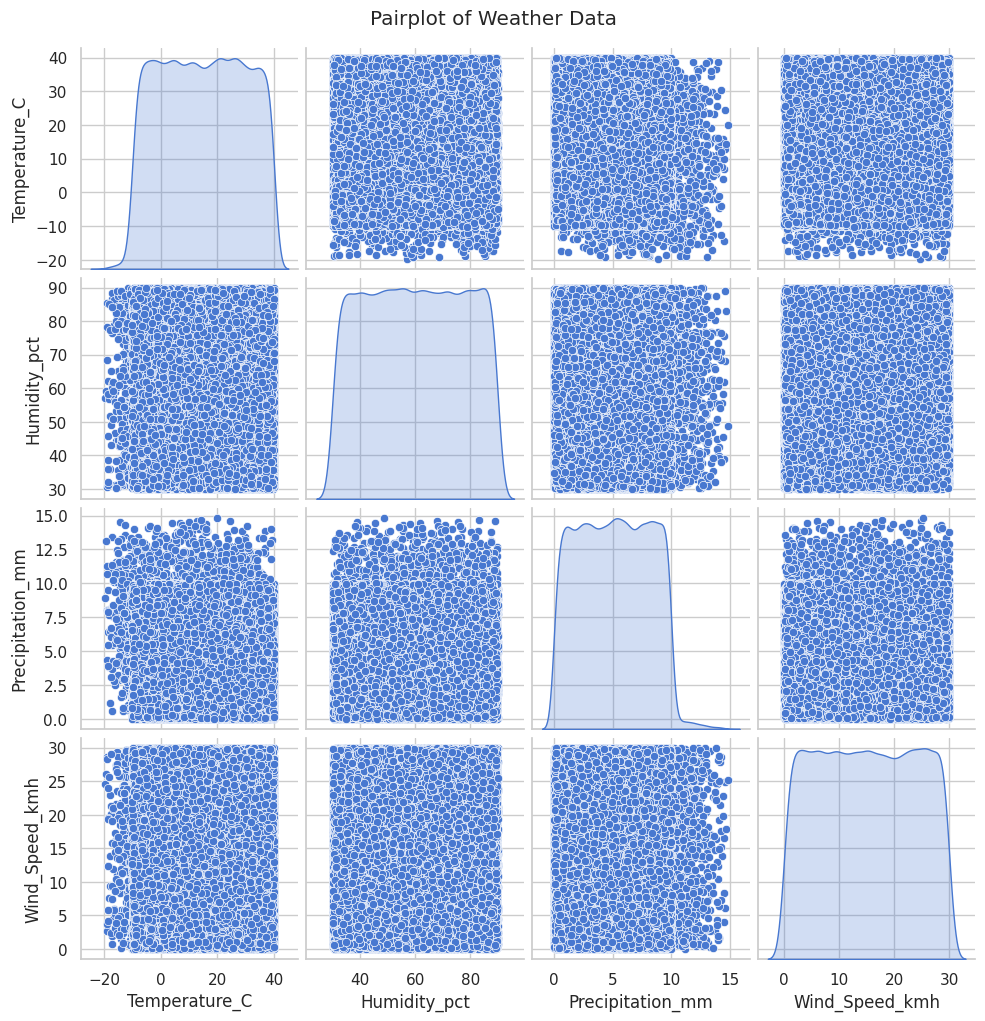

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(weather, diag_kind="kde")
plt.suptitle('Pairplot of Weather Data', y=1.02)
plt.show()

In [ ]:
# Model Training: Predict Temperature using other features
X = weather[['Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']]
y = weather['Temperature_C']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)


In [ ]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
Mean Squared Error: 210.62
R-squared: -0.00


In [38]:
# Example future values for prediction
future_humidity = 60  # Example value in percentage
future_precipitation = 0  # Example value in mm (e.g., no precipitation)
future_wind_speed = 15  # Example value in km/h

# Combine features into a single input array
future_input = [[future_humidity, future_precipitation, future_wind_speed]]

# Predict the future temperature
future_temp = model.predict(future_input)
print(f"\nPredicted Future Temperature: {future_temp[0]:.2f} °C")


Predicted Future Temperature: 14.93 °C


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


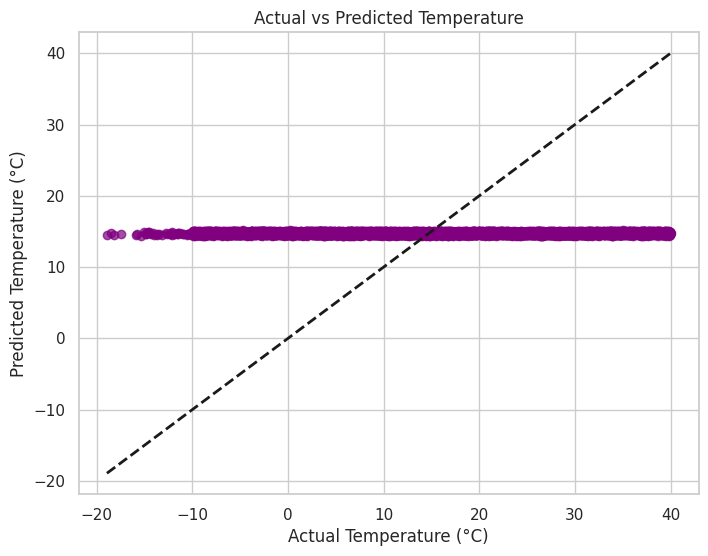

In [36]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.show()

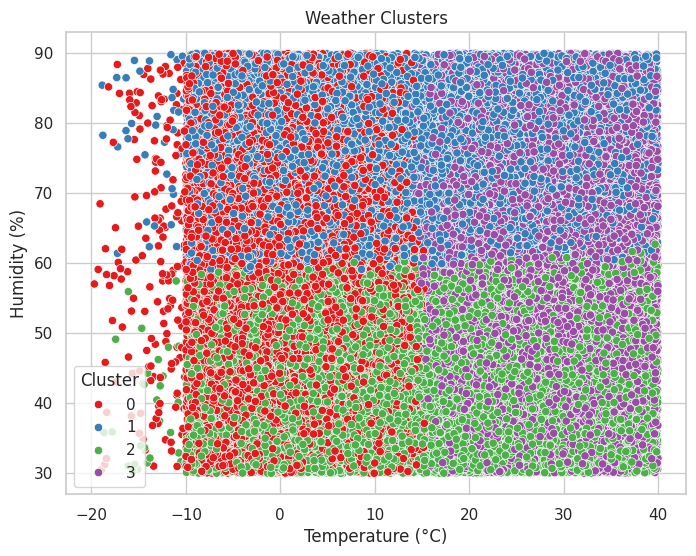

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = weather[['Temperature_C', 'Humidity_pct', 'Wind_Speed_kmh', 'Precipitation_mm']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
weather['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=weather, x='Temperature_C', y='Humidity_pct', hue='Cluster', palette='Set1')
plt.title('Weather Clusters')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()